In [1]:
!pip install openCV-python

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


0.jpg	  1845.jpg  268.jpg   3533.jpg	4378.jpg  5221.jpg  6067.jpg  6912.jpg	7757.jpg  8601.jpg
1000.jpg  1846.jpg  2690.jpg  3534.jpg	4379.jpg  5222.jpg  6068.jpg  6913.jpg	7758.jpg  8602.jpg
1001.jpg  1847.jpg  2691.jpg  3535.jpg	437.jpg   5223.jpg  6069.jpg  6914.jpg	7759.jpg  8603.jpg
1002.jpg  1848.jpg  2692.jpg  3536.jpg	4380.jpg  5224.jpg  606.jpg   6915.jpg	775.jpg   8604.jpg
1003.jpg  1849.jpg  2693.jpg  3537.jpg	4381.jpg  5225.jpg  6070.jpg  6916.jpg	7760.jpg  8605.jpg
1004.jpg  184.jpg   2694.jpg  3538.jpg	4382.jpg  5226.jpg  6071.jpg  6917.jpg	7761.jpg  8606.jpg
1005.jpg  1850.jpg  2695.jpg  3539.jpg	4383.jpg  5227.jpg  6072.jpg  6918.jpg	7762.jpg  8607.jpg
1006.jpg  1851.jpg  2696.jpg  353.jpg	4384.jpg  5228.jpg  6073.jpg  6919.jpg	7763.jpg  8608.jpg
1007.jpg  1852.jpg  2697.jpg  3540.jpg	4385.jpg  5229.jpg  6074.jpg  691.jpg	7764.jpg  8609.jpg
1008.jpg  1853.jpg  2698.jpg  3541.jpg	4386.jpg  522.jpg   6075.jpg  6920.jpg	7765.jpg  860.jpg
1009.jpg  1854.jpg  2699.jpg  3542.

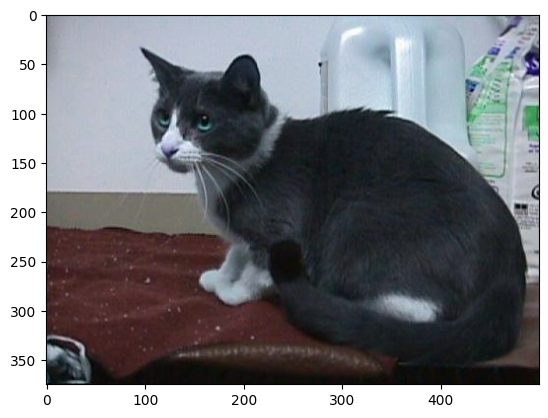

In [4]:
import zipfile
import os

# Path to the uploaded zip file
zip_file_path = '/content/drive/MyDrive/Computer Vision/CATS_DOGS.zip'

# Unzipping the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/')  # Extract files to /content/

# List the extracted files to confirm
!ls /content/CATS_DOGS/CATS_DOGS/train/CAT

import cv2
import matplotlib.pyplot as plt
import numpy as np

cat = cv2.imread('/content/CATS_DOGS/CATS_DOGS/train/CAT/4.jpg')

plt.imshow(cat)

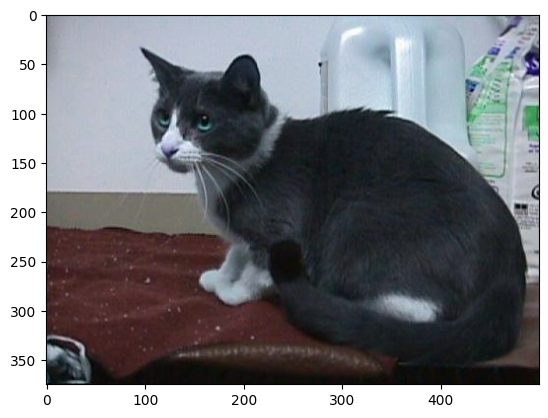

In [5]:
plt.imshow(cat)

In [6]:
cat_rgb= cv2.cvtColor(cat, cv2.COLOR_BGR2RGB)


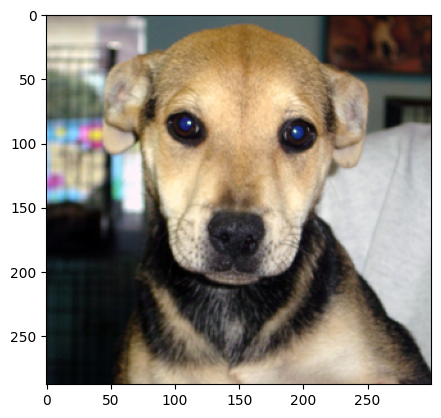

In [7]:
dog= cv2.imread('CATS_DOGS/CATS_DOGS/train/DOG/4.jpg')
plt.imshow(cv2.cvtColor(dog, cv2.COLOR_BGR2RGB))

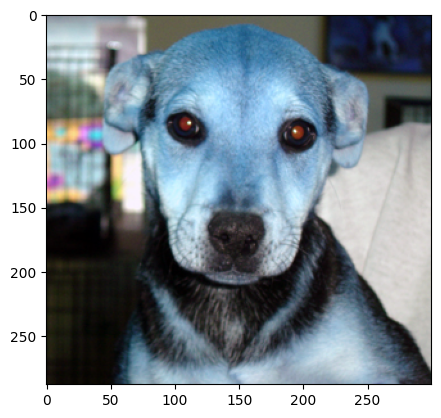

In [8]:
dog= cv2.imread('CATS_DOGS/CATS_DOGS/train/DOG/4.jpg')
plt.imshow(dog)#.cvtColor(dog, cv2.COLOR_BGR2RGB))

## Shapes

In [9]:
dog.shape

(288, 300, 3)

In [10]:
cat.shape

(375, 500, 3)

##Preparing the data for model

In [11]:
import tensorflow as tf
#from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
image_gen= ImageDataGenerator(rotation_range=30, #Rotation of Image
                              width_shift_range=0.2,
                             height_shift_range=0.2,
                             rescale=1/255,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest')

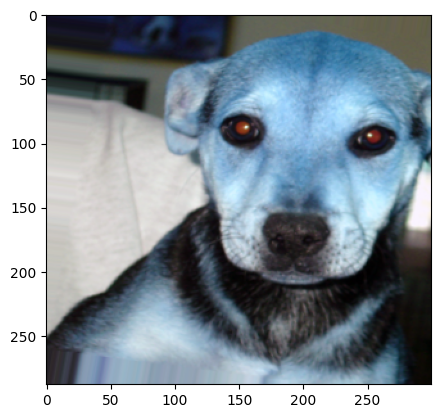

In [13]:
plt.imshow(image_gen.random_transform(dog))

##Making a flow (Pipeline)

In [14]:
train_img = image_gen.flow_from_directory('CATS_DOGS/CATS_DOGS/train')

Found 18743 images belonging to 2 classes.


In [15]:
image_gen.flow_from_directory('CATS_DOGS/CATS_DOGS/test')

Found 6251 images belonging to 2 classes.


In [16]:
train_img.class_indices

{'CAT': 0, 'DOG': 1}

##Building the model

In [17]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [18]:
model= Sequential()

# First Conv Layer - Asghar Rehman
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(150,150,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#Second Layer - Mahwish Naz
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#Third layer - Samia
model.add(Conv2D(filters=40, kernel_size=(5,5), activation='silu'))
model.add(Conv2D(filters=65, kernel_size=(8,8), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

# Bilal's Layers
model.add(Dense(512))
model.add(Activation('relu'))

model.add(Dropout(0.5)) #Regularization Techniques

#Output Layer (Cat=0 Dog=1)
model.add(Dense(1, activation='sigmoid'))



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 147, 147, 32)        │           1,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 73, 73, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 71, 71, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 35, 35, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 31, 31, 40)          │          64,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 65)          │         166,465 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 12, 12, 65)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9360)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       4,792,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,043,914 (19.24 MB)

 Trainable params: 5,043,914 (19.24 MB)

 Non-trainable params: 0 (0.00 B)

## Training the Model

In [21]:
batch_size = 16
train_img_gen = image_gen.flow_from_directory('CATS_DOGS/CATS_DOGS/train', target_size=(150,150), batch_size = 16, class_mode='binary')

Found 18743 images belonging to 2 classes.


In [22]:
test_img_gen = image_gen.flow_from_directory('CATS_DOGS/CATS_DOGS/test', target_size=(150,150), batch_size = 16, class_mode='binary')

Found 6251 images belonging to 2 classes.


In [23]:
results = model.fit(train_img_gen,
                  epochs=10,
                  steps_per_epoch=150,
                  validation_data=test_img_gen,
                  validation_steps=10)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 89/150 ━━━━━━━━━━━━━━━━━━━━ 1:12 1s/step - accuracy: 0.4840 - loss: 0.9179

/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:900: UserWarning: Truncated File Read
  warnings.warn(str(msg))


150/150 ━━━━━━━━━━━━━━━━━━━━ 188s 1s/step - accuracy: 0.4872 - loss: 0.8480 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 179s 1s/step - accuracy: 0.5044 - loss: 0.6932 - val_accuracy: 0.4875 - val_loss: 0.6935
Epoch 3/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 182s 1s/step - accuracy: 0.4923 - loss: 0.6935 - val_accuracy: 0.5500 - val_loss: 0.6890
Epoch 4/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 183s 1s/step - accuracy: 0.5002 - loss: 0.6932 - val_accuracy: 0.4812 - val_loss: 0.6936
Epoch 5/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 184s 1s/step - accuracy: 0.4779 - loss: 0.6934 - val_accuracy: 0.4750 - val_loss: 0.6937
Epoch 6/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 181s 1s/step - accuracy: 0.5097 - loss: 0.6930 - val_accuracy: 0.5188 - val_loss: 0.6930
Epoch 7/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 189s 1s/step - accuracy: 0.5130 - loss: 0.6931 - val_accuracy: 0.4625 - val_loss: 0.6932
Epoch 8/10
122/150 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.4794 - loss: 0.6933

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


150/150 ━━━━━━━━━━━━━━━━━━━━ 150s 996ms/step - accuracy: 0.4805 - loss: 0.6933 - val_accuracy: 0.5625 - val_loss: 0.6930
Epoch 9/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 215s 1s/step - accuracy: 0.5183 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 10/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 185s 1s/step - accuracy: 0.4914 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6932


## Evaluating the Model

In [24]:
results.history['accuracy']

[0.4975000023841858,
 0.5094102621078491,
 0.49791666865348816,
 0.5049999952316284,
 0.5087500214576721,
 0.5054166913032532,
 0.4962500035762787,
 0.5025614500045776,
 0.4870833456516266,
 0.5066666603088379]

In [25]:
model.save('ds7.h5')

## Running Inference

In [26]:
dog_file = 'CATS_DOGS/CATS_DOGS/train/DOG/4.jpg'

In [27]:
from keras.preprocessing import image
dog_img = image.load_img(dog_file, target_size=(150,150))

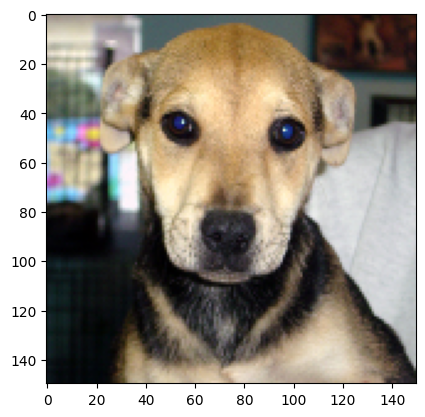

In [28]:
plt.imshow(dog_img)

In [28]:
dog_img = image.img_to_array(dog_img)

In [29]:
import numpy as np
dog_img = np.expand_dims(dog_img, axis=0)

In [31]:
dog_img.shape

(1, 150, 150, 3)

In [51]:
import numpy as np
from keras.models import load_model

new_model = load_model('/content/drive/MyDrive/Computer Vision/cat_dog_100epochs.h5')


TypeError: pop expected at most 1 argument, got 2

In [ ]:
prediction_prob =